In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import Lasso
from sklearn.cross_decomposition import PLSRegression
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
%matplotlib inline 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Upload dataset

In [ ]:
#C:\\Users\\ASUS\\Desktop\\shai-ml\\
train_data = pd.read_csv('/content/drive/MyDrive/shai-ml/train.csv')

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/shai-ml/test.csv')

In [ ]:
#split diamond data into data & labels
from sklearn.model_selection import train_test_split
train_set ,test_set = train_test_split(train_data,test_size = 0.2,random_state = 42 )

In [ ]:
train_set.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
6620,8142,0.90,Premium,H,VVS2,62.0,58.0,4355,6.16,6.13,3.81
38308,47475,0.52,Very Good,D,VS1,62.6,59.0,1860,5.03,5.13,3.18
41706,52107,0.47,Ideal,D,VVS1,62.0,54.0,2460,4.99,5.01,3.10
22543,28015,0.30,Ideal,E,VS2,62.6,54.0,658,4.29,4.33,2.70
28532,35361,0.38,Premium,I,VS1,61.3,60.0,898,4.65,4.62,2.84


In [ ]:
test_set.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
39754,49326,0.75,Very Good,H,SI2,62.2,58.0,2093,5.77,5.83,3.61
2705,3471,0.71,Good,F,IF,62.1,62.0,3393,5.68,5.79,3.56
14948,18479,1.25,Very Good,H,VS2,63.3,57.0,7525,6.87,6.82,4.33
18874,23543,2.01,Good,J,SI2,63.4,59.0,11554,7.95,7.99,5.05
17647,22012,1.52,Good,H,SI1,63.8,60.0,10078,7.30,7.24,4.64


In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34432 entries, 6620 to 15795
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  34432 non-null  int64  
 1   carat       34432 non-null  float64
 2   cut         34432 non-null  object 
 3   color       34432 non-null  object 
 4   clarity     34432 non-null  object 
 5   depth       34432 non-null  float64
 6   table       34432 non-null  float64
 7   price       34432 non-null  int64  
 8   x           34432 non-null  float64
 9   y           34432 non-null  float64
 10  z           34432 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.2+ MB


In [ ]:
# Drop the "Unnamed: 0" column
train_set = train_set.drop("Unnamed: 0", axis = 1)

# Price is int64, best if all numeric attributes have the same datatype, especially as float64
train_set["price"] = train_set["price"].astype(float)

# Preview dataset again
train_set.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
6620,0.90,Premium,H,VVS2,62.0,58.0,4355.0,6.16,6.13,3.81
38308,0.52,Very Good,D,VS1,62.6,59.0,1860.0,5.03,5.13,3.18
41706,0.47,Ideal,D,VVS1,62.0,54.0,2460.0,4.99,5.01,3.10
22543,0.30,Ideal,E,VS2,62.6,54.0,658.0,4.29,4.33,2.70
28532,0.38,Premium,I,VS1,61.3,60.0,898.0,4.65,4.62,2.84


In [ ]:
#Checking for duplicate records in the data
dups = train_set .duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(train_set .shape)

Number of duplicate rows = 80
(34432, 10)


In [ ]:
print('Before',train_set.shape)
train_set.drop_duplicates(inplace=True) 
print('After',train_set.shape)

Before (34432, 10)
After (34352, 10)


In [ ]:
train_set["cut"].value_counts()

Ideal        13924
Premium       8804
Very Good     7551
Good          3114
Fair           959
Name: cut, dtype: int64

In [ ]:
train_set["color"].value_counts()

G    7272
E    6099
F    6073
H    5293
D    4452
I    3414
J    1749
Name: color, dtype: int64

In [ ]:
train_set["clarity"].value_counts()

SI1     8273
VS2     7973
SI2     5851
VS1     5175
VVS2    3196
VVS1    2258
IF      1192
I1       434
Name: clarity, dtype: int64

In [ ]:
train_set.describe()

,carat,depth,table,price,x,y,z
count,34352.000000,34352.000000,34352.000000,34352.000000,34352.000000,34352.000000,34352.000000
mean,0.798002,61.741849,57.436941,3958.504658,5.727570,5.731838,3.535902
std,0.482149,1.423439,2.241567,4033.920500,1.132485,1.168377,0.717971
min,0.200000,43.000000,44.000000,335.000000,0.000000,0.000000,0.000000
25%,0.380000,61.000000,56.000000,942.000000,4.660000,4.670000,2.870000
50%,0.710000,61.800000,57.000000,2391.000000,5.710000,5.720000,3.530000
75%,1.030000,62.500000,59.000000,5347.000000,6.510000,6.500000,4.020000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Data Analysis & Visualization

In [ ]:
corr_matrix = train_set.corr()
corr_matrix["price"].sort_values(ascending=False)

price    1.000000
carat    0.923252
x        0.888350
y        0.858541
z        0.856001
table    0.136393
depth   -0.016125
Name: price, dtype: float64

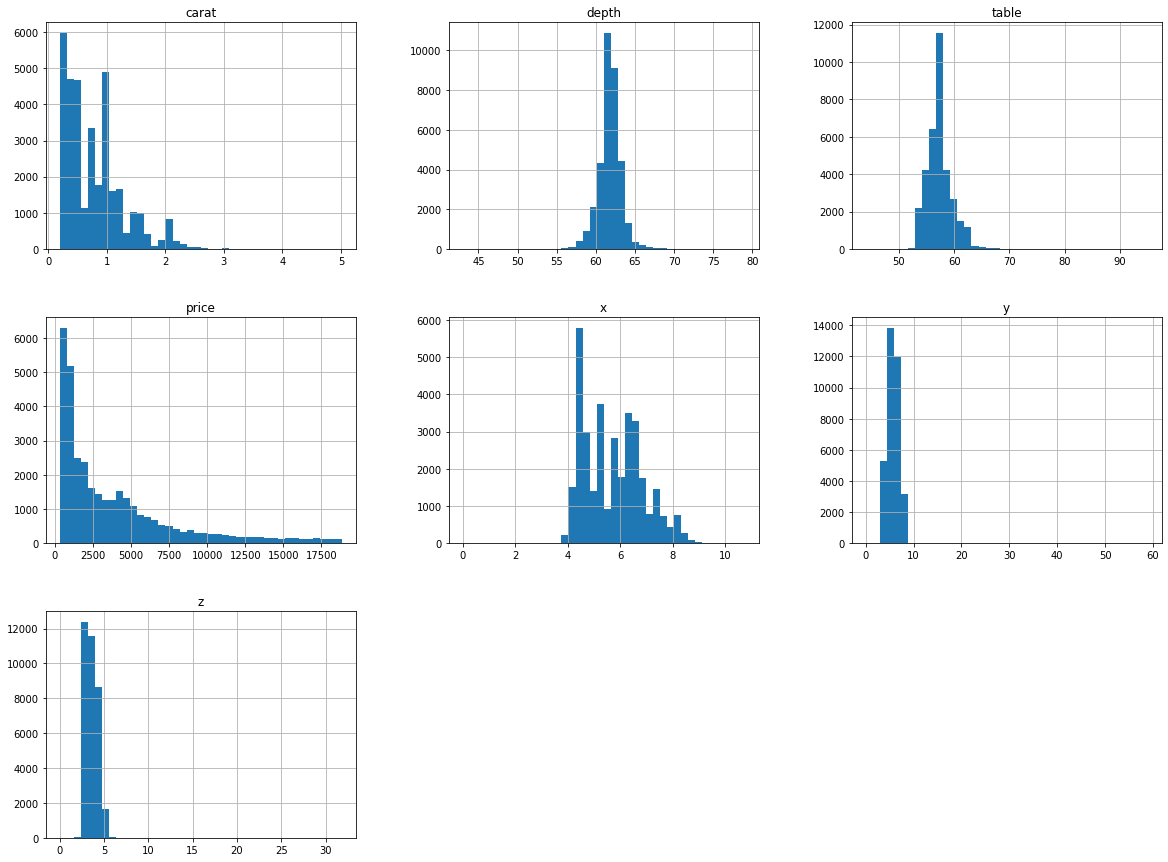

In [ ]:
train_set.hist(bins = 40, figsize = (20,15))
plt.show()

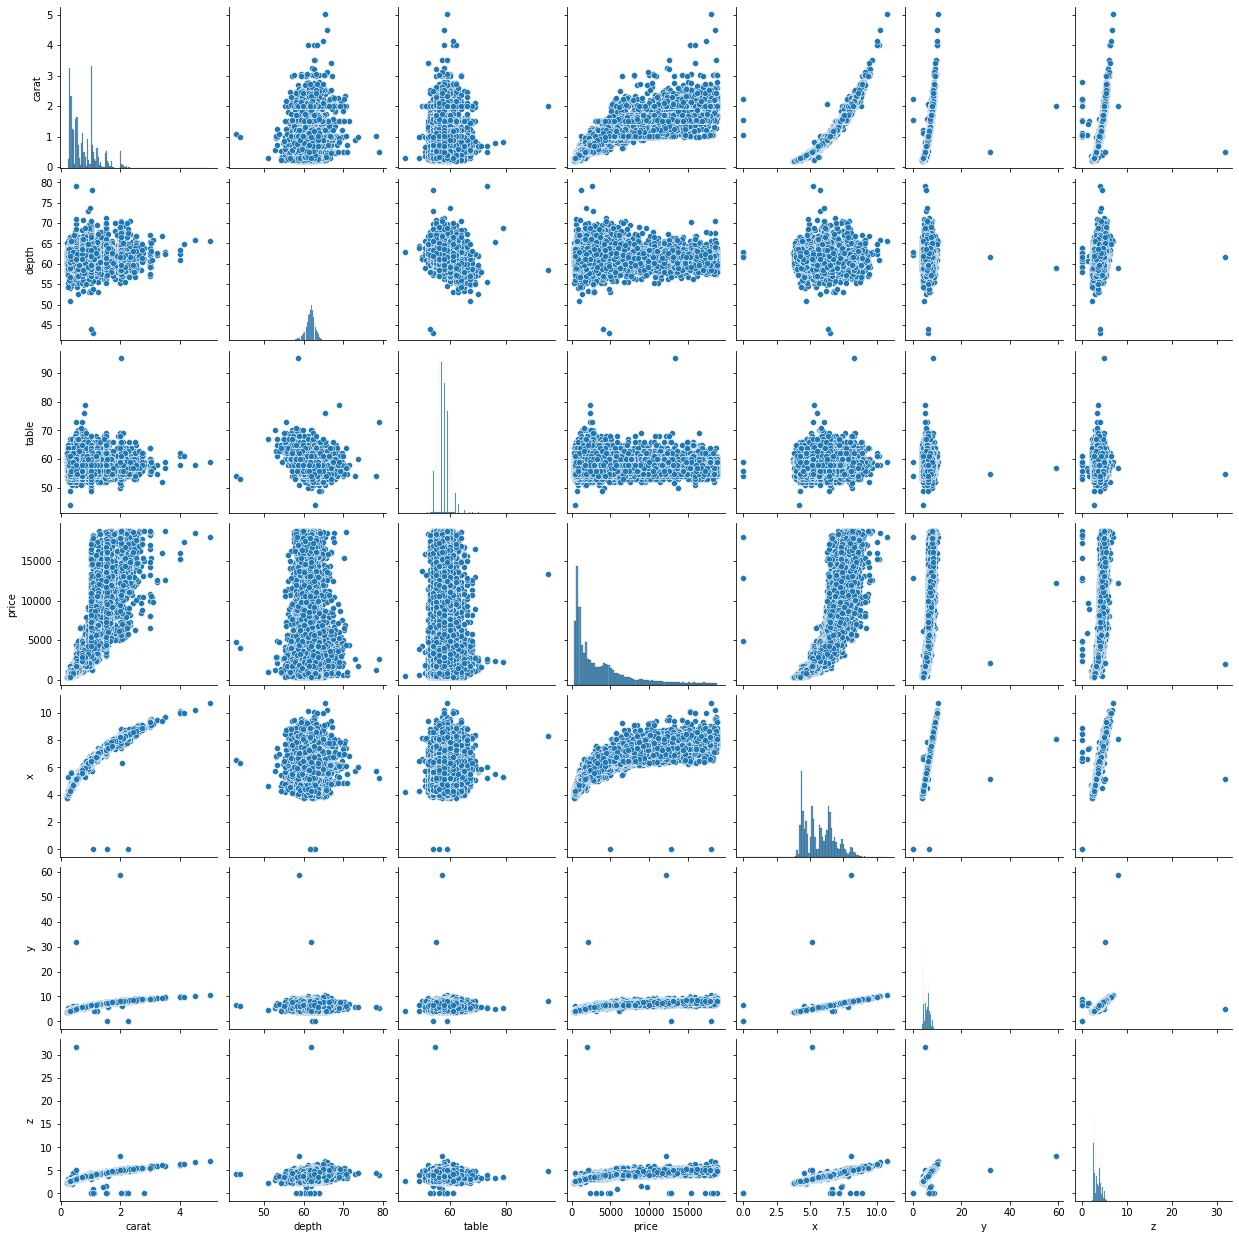

In [ ]:
ans =sns.pairplot(train_set)

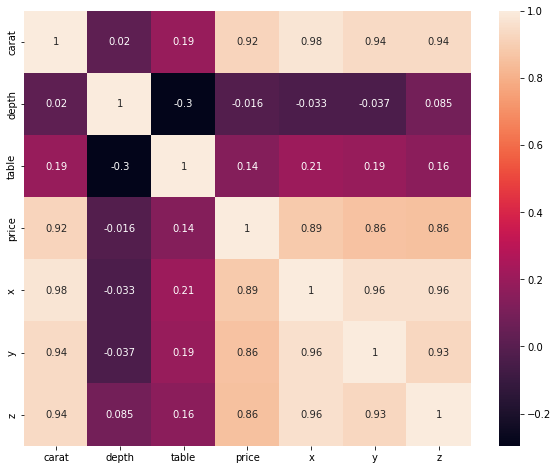

In [ ]:
# Plot the correlation with seaborn
plt.subplots(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


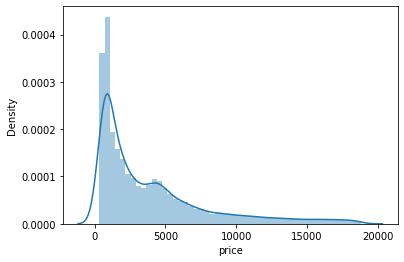

In [ ]:
sns.distplot(train_set.price)

In [ ]:
train_set.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
print("Number of rows with x == 0: {} ".format((train_set.x==0).sum()))
print("Number of rows with y == 0: {} ".format((train_set.y==0).sum()))
print("Number of rows with z == 0: {} ".format((train_set.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((train_set.depth==0).sum()))

Number of rows with x == 0: 3 
Number of rows with y == 0: 2 
Number of rows with z == 0: 13 
Number of rows with depth == 0: 0 


In [ ]:
train_set[['x','y','z']] = train_set[['x','y','z']].replace(0,np.NaN)

In [ ]:
train_set.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           3
y           2
z          13
dtype: int64

In [ ]:
train_set.dropna(inplace=True)

In [ ]:
train_set.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
train_set.shape

(34339, 10)

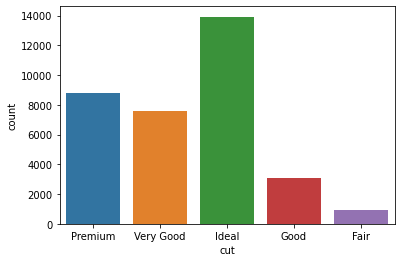

In [ ]:
ans = sns.countplot(data = train_set,x = 'cut')

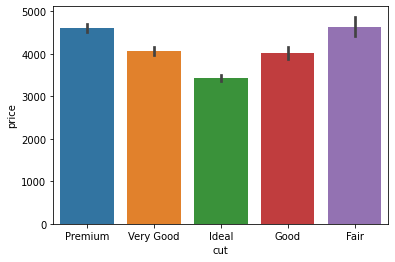

In [ ]:
ans = sns.barplot(data = train_set, x ='cut', y='price')

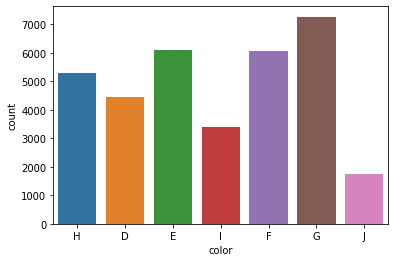

In [ ]:
ans = sns.countplot(data = train_set,x = 'color')

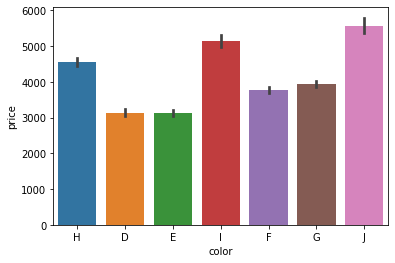

In [ ]:
ans = sns.barplot(data = train_set, x ='color', y='price')

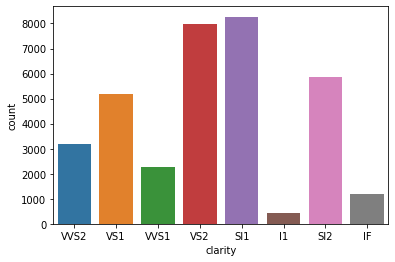

In [ ]:
ans = sns.countplot(data = train_set,x = 'clarity')

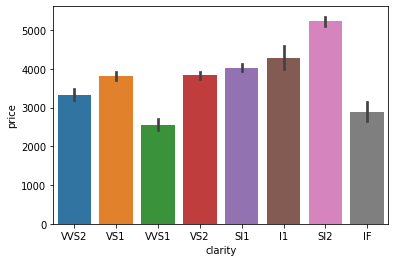

In [ ]:

ans = sns.barplot(data = train_set, x ='clarity', y='price')

In [ ]:
layout_options = {
    'paper_bgcolor':"#383838",
    'plot_bgcolor':'#383838',
    'title_font': dict(color='white'),
    'legend_font': dict(color='white'),
    'yaxis':dict(color="white"),
    'xaxis':dict(color="white")
    }

## Feature Engineering

In [ ]:
train_set['space'] = train_set['x'] * train_set['y']
train_set['volume'] = train_set['x'] * train_set['y'] * train_set['z']

In [ ]:
corr_matrix = train_set.corr()
corr_matrix["price"].sort_values(ascending=False)

price     1.000000
carat     0.923198
space     0.900220
volume    0.896333
x         0.890439
z         0.863795
y         0.860145
table     0.136583
depth    -0.016347
Name: price, dtype: float64

In [ ]:
train_set.drop(['x','y','z'], axis = 1, inplace = True)
train_set.head()

,carat,cut,color,clarity,depth,table,price,space,volume
6620,0.90,Premium,H,VVS2,62.0,58.0,4355.0,37.7608,143.868648
38308,0.52,Very Good,D,VS1,62.6,59.0,1860.0,25.8039,82.056402
41706,0.47,Ideal,D,VVS1,62.0,54.0,2460.0,24.9999,77.499690
22543,0.30,Ideal,E,VS2,62.6,54.0,658.0,18.5757,50.154390
28532,0.38,Premium,I,VS1,61.3,60.0,898.0,21.4830,61.011720


##One hot Encoding

In [ ]:
one_hot_encoders_train_data =  pd.get_dummies(train_set)
cols = one_hot_encoders_train_data.columns
train_clean_data = pd.DataFrame(one_hot_encoders_train_data,columns= cols)
train_clean_data.head()

,carat,depth,table,price,space,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
6620,0.90,62.0,58.0,4355.0,37.7608,143.868648,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
38308,0.52,62.6,59.0,1860.0,25.8039,82.056402,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
41706,0.47,62.0,54.0,2460.0,24.9999,77.499690,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22543,0.30,62.6,54.0,658.0,18.5757,50.154390,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
28532,0.38,61.3,60.0,898.0,21.4830,61.011720,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
numericals =  pd.DataFrame(sc_X.fit_transform(train_clean_data[['carat','depth','table','space','volume']]),
                           columns=['carat','depth','table','space','volume'],
                           index=train_clean_data.index)


train_clean_data_standard = train_clean_data.copy(deep=True)
train_clean_data_standard[['carat','depth','table','space','volume']] = numericals[['carat','depth','table','space','volume']]
train_clean_data_standard.head()

,carat,depth,table,price,space,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
6620,0.212412,0.181246,0.251294,4355.0,0.266369,0.172683,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
38308,-0.576328,0.602826,0.697425,1860.0,-0.603425,-0.595412,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
41706,-0.680109,0.181246,-1.533234,2460.0,-0.661911,-0.652035,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22543,-1.032967,0.602826,-1.533234,658.0,-1.129234,-0.991835,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
28532,-0.866916,-0.310598,1.143557,898.0,-0.917745,-0.856919,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
X_train = train_clean_data_standard.drop(["price"],axis=1)
Y_train = train_clean_data_standard.price

In [ ]:
X_train.shape

(34339, 25)

### Preprocessing Test data

In [ ]:
# Drop the "Unnamed: 0" column
test_set = test_set.drop("Unnamed: 0", axis = 1)

In [ ]:
test_set['space'] = test_set['x'] * test_set['y']
test_set['volume'] = test_set['x'] * test_set['y'] * test_set['z']
test_set.drop(['x','y','z'], axis = 1, inplace = True)

one_hot_encoders_test_data =  pd.get_dummies(test_set)
cols = one_hot_encoders_test_data.columns
test_clean_data = pd.DataFrame(one_hot_encoders_test_data,columns= cols)

numericals =  pd.DataFrame(sc_X.transform(test_clean_data[['carat','depth','table','space','volume']]),
                           columns=['carat','depth','table','space','volume'],
                           index=test_clean_data.index)

test_clean_data_standard = test_clean_data.copy(deep=True)
test_clean_data_standard[['carat','depth','table','space','volume']] = numericals[['carat','depth','table','space','volume']]
X_test = test_clean_data_standard.drop(["price"],axis=1)
X_test.head()

,carat,depth,table,space,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
39754,-0.098933,0.321772,0.251294,-0.033460,-0.106057,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2705,-0.181958,0.251509,2.035821,-0.088157,-0.160220,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
14948,0.938883,1.094670,-0.194838,0.927802,0.905914,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
18874,2.516363,1.164933,0.697425,2.140235,2.371011,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
17647,1.499304,1.445987,1.143557,1.364165,1.432266,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
X_test.shape

(8608, 25)

In [ ]:
Y_test = test_set.price

### Select and Train Model

In [ ]:
#CV = []
#R2_train = []
rmse_ = []
def evaluation_train(model):

  model.fit(X_train,Y_train)
  Y_pred = model.predict(X_train)
  # MAE
  mae =mean_absolute_error(Y_train, Y_pred)
    
  # MSE
  lin_mse = mean_squared_error(Y_train, Y_pred)
  lin_rmse = np.sqrt(lin_mse)


  scores = cross_val_score(model, X_train, Y_train, scoring ="neg_mean_squared_error",cv = 10)
  rmse_scores = np.sqrt(-scores)

  return mae,lin_rmse,rmse_scores,rmse_scores.mean(),rmse_scores.std()

In [ ]:
def meansquarederror(y_pred, y_test):
    lin_mse = mean_squared_error(y_pred, y_test)
    lin_rmse = np.sqrt(lin_mse)
    return lin_rmse

#### Linear Regression Model

In [ ]:
X_train.shape

(34339, 25)

In [ ]:
model_1 = LinearRegression()
model_1.fit(X_train,Y_train)
mse,lin_rmse,rmse_scores,rmse_scores_mean,rmse_scores_std =evaluation_train(model_1)
print("MAE: ",lin_rmse)
print("MSE: ",mse)
print("Scores: ", rmse_scores)
print("Mean: ", rmse_scores_mean)
print("Standard Deviation: ", rmse_scores_std)

MAE:  1147.0330750400021
MSE:  753.4677011541347
Scores:  [1217.45044738 1184.87782493 1186.72155316 1161.89275919 1083.01134959
 1102.68568084 1155.97347577 1138.10568397 1145.82991439 1152.09524237]
Mean:  1152.8643931598167
Standard Deviation:  37.548567392007236


In [ ]:
y_pred=model_1.predict(X_test)
rmse_.append(meansquarederror(y_pred, Y_test))
meansquarederror(y_pred, Y_test)

1106.6369654913747

#### Decision Tree Regressor Model

In [ ]:
model_2 = DecisionTreeRegressor()
model_2.fit(X_train,Y_train)

mse,lin_rmse,rmse_scores,rmse_scores_mean,rmse_scores_std =evaluation_train(model_2)
print("MAE: ",lin_rmse)
print("MSE: ",mse)
print("Scores: ", rmse_scores)
print("Mean: ", rmse_scores_mean)
print("Standard Deviation: ", rmse_scores_std)

MAE:  33.770720019288305
MSE:  13.632400477591077
Scores:  [735.49626158 804.33119896 723.87930332 799.67854325 736.45694153
 746.00142987 791.36150371 786.56303118 742.91794986 741.08531829]
Mean:  760.7771481551512
Standard Deviation:  29.202184947510492


In [ ]:
y_pred=model_2.predict(X_test)
rmse_.append(meansquarederror(y_pred, Y_test))
meansquarederror(y_pred, Y_test)

751.6097275577966

####  Random Forest Regressor Model

In [ ]:
model_3 = RandomForestRegressor()
model_3.fit(X_train,Y_train)

mse,lin_rmse,rmse_scores,rmse_scores_mean,rmse_scores_std =evaluation_train(model_3)
print("MAE: ",lin_rmse)
print("MSE: ",mse)
print("Scores: ", rmse_scores)
print("Mean: ", rmse_scores_mean)
print("Standard Deviation: ", rmse_scores_std)

MAE:  214.89758181127985
MSE:  110.69322913277837
Scores:  [549.25152948 557.14423773 543.49126676 644.93925727 551.28631079
 580.61517503 617.80603757 569.21364097 545.09350789 613.58951678]
Mean:  577.2430480269874
Standard Deviation:  34.14536050343759


In [ ]:
y_pred=model_3.predict(X_test)
rmse_.append(meansquarederror(y_pred, Y_test))
meansquarederror(y_pred, Y_test)

558.729808143182

####Support Vector Machines

In [ ]:
rbf = SVR(kernel="rbf")
rbf.fit(X_train,Y_train)

mse,lin_rmse,rmse_scores,rmse_scores_mean,rmse_scores_std =evaluation_train(rbf)
print("MAE: ",lin_rmse)
print("MSE: ",mse)
print("Scores: ", rmse_scores)
print("Mean: ", rmse_scores_mean)
print("Standard Deviation: ", rmse_scores_std)

MAE:  3001.919450379363
MSE:  1459.123123005432
Scores:  [3029.5137252  3016.31026125 3061.03303837 3001.33762907 3060.56143809
 3081.76104241 3142.96834243 3262.1510635  2973.96386667 3023.27211765]
Mean:  3065.287252464403
Standard Deviation:  79.35666755051207


In [ ]:
y_pred=rbf.predict(X_test)
rmse_.append(meansquarederror(y_pred, Y_test))
meansquarederror(y_pred, Y_test)

2948.7691461912955

In [ ]:
linear = SVR(kernel="linear")
linear.fit(X_train,Y_train)

mse,lin_rmse,rmse_scores,rmse_scores_mean,rmse_scores_std =evaluation_train(linear)
print("MAE: ",lin_rmse)
print("MSE: ",mse)
print("Scores: ", rmse_scores)
print("Mean: ", rmse_scores_mean)
print("Standard Deviation: ", rmse_scores_std)

MAE:  1516.9544671364029
MSE:  794.5257301255922
Scores:  [1482.29246134 1954.33756052 1498.44261958 1456.46509926 1423.65242184
 1453.77870607 1519.07937086 1517.48156016 1437.9492913  1507.79744756]
Mean:  1525.1276538499087
Standard Deviation:  146.5830746170708


In [ ]:
y_pred=linear.predict(X_test)
rmse_.append(meansquarederror(y_pred, Y_test))
meansquarederror(y_pred, Y_test)

1406.842293278012

#### Random Forest Regressor Hyperparameter tuning

In [ ]:
best_model = RandomForestRegressor(n_estimators=400,
                                  max_features='sqrt',
                                  )

mse,lin_rmse,rmse_scores,rmse_scores_mean,rmse_scores_std =evaluation_train(best_model)
print("MAE: ",lin_rmse)
print("MSE: ",mse)
print("Scores: ", rmse_scores)
print("Mean: ", rmse_scores_mean)
print("Standard Deviation: ", rmse_scores_std)

MAE:  219.4988680214126
MSE:  114.36603073114756
Scores:  [596.242016   595.72601002 579.48890287 642.54177198 561.78969967
 580.58029534 650.6616325  585.66118163 549.77437602 601.39881352]
Mean:  594.3864699550885
Standard Deviation:  30.135866325460086


In [ ]:
y_pred=best_model.predict(X_test)
rmse_.append(meansquarederror(y_pred, Y_test))
meansquarederror(y_pred, Y_test)

566.5596371948113

In [ ]:
model_7 = RandomForestRegressor(criterion= 'squared_error',n_estimators= 500)
model_7.fit(X_train,Y_train)

mse,r_rmse,rmse_scores,rmse_scores_mean,rmse_scores_std =evaluation_train(model_7)
print("MAE: ",r_rmse)
print("MSE: ",mse)
print("Scores: ", rmse_scores)
print("Mean: ", rmse_scores_mean)
print("Standard Deviation: ", rmse_scores_std)

MAE:  212.13655213176216
MSE:  109.79573090382218
Scores:  [544.29831318 561.28969273 538.72166242 641.41519404 548.8339461
 581.48800227 620.06235429 562.9636961  539.35065976 614.41606234]
Mean:  575.2839583212955
Standard Deviation:  35.47337299756265


In [ ]:
y_pred=model_7.predict(X_test)
rmse_.append(meansquarederror(y_pred, Y_test))
meansquarederror(y_pred, Y_test)

558.523607153869

#### Grid Search

In [ ]:
parameters = {
   'nthread':[x for x in range(1,6)], 
   'objective':['reg:squarederror'],
   'learning_rate': [.01,.03, 0.05,0.02], 
    'max_depth': [x for x in range(4,10)],
     'n_estimators': [500,700,200,400,800]
}

In [ ]:
RegModel=XGBRegressor()

In [ ]:
grid_search = GridSearchCV(RegModel, parameters, cv=5,scoring='neg_mean_squared_error',return_train_score=True)

In [ ]:
grid_search.fit(X_train,Y_train)
y_pred=grid_search.predict(X_test)
meansquarederror(y_pred, y_test)

#### AdaBoost Regression

In [ ]:
model_6 = AdaBoostRegressor(n_estimators = 100)
model_6.fit(X_train,Y_train)

mse,lin_rmse,rmse_scores,rmse_scores_mean,rmse_scores_std =evaluation_train(model_6)
print("MAE: ",lin_rmse)
print("MSE: ",mse)
print("Scores: ", rmse_scores)
print("Mean: ", rmse_scores_mean)
print("Standard Deviation: ", rmse_scores_std)

AdaBoostRegressor(n_estimators=100)

In [ ]:
y_pred=model_6.predict(X_test)
rmse_.append(meansquarederror(y_pred, Y_test))
meansquarederror(y_pred, Y_test)

1454.861090670476

#### GradientBoosting Regression

In [ ]:
model_7 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1)
model_7.fit(X_train,Y_train)

mse,lin_rmse,rmse_scores,rmse_scores_mean,rmse_scores_std =evaluation_train(model_7)
print("MAE: ",lin_rmse)
print("MSE: ",mse)
print("Scores: ", rmse_scores)
print("Mean: ", rmse_scores_mean)
print("Standard Deviation: ", rmse_scores_std)

MAE:  1239.1773276838967
MSE:  713.1419789102674
Scores:  [1268.13745953 1231.29379251 1261.15722231 1223.46972498 1199.00433068
 1234.10095851 1311.84004729 1274.7517053  1210.57674984 1277.99848973]
Mean:  1249.2330480677379
Standard Deviation:  33.36110136103438


In [ ]:
y_pred=model_7.predict(X_test)
rmse_.append(meansquarederror(y_pred, Y_test))
meansquarederror(y_pred, Y_test)

1192.5264813891988

####XGBRegressor

In [ ]:
model_8 = XGBRegressor()
model_8.fit(X_train,Y_train)

mse,lin_rmse,rmse_scores,rmse_scores_mean,rmse_scores_std =evaluation_train(model_8)
print("MAE: ",lin_rmse)
print("MSE: ",mse)
print("Scores: ", rmse_scores)
print("Mean: ", rmse_scores_mean)
print("Standard Deviation: ", rmse_scores_std)

[18:37:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:37:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:37:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:37:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:37:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:37:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:37:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:37:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
y_pred=model_8.predict(X_test)
rmse_.append(meansquarederror(y_pred, Y_test))
meansquarederror(y_pred, Y_test)

718.7209175096459

In [ ]:
model_9=XGBRegressor(colsample_bytree= 0.7,learning_rate= 0.03,max_depth= 7,min_child_weight= 5,n_estimators= 500,nthread= 1,objective= 'reg:squarederror',subsample= 0.7)
model_9.fit(X_train,Y_train)

mse,lin_rmse,rmse_scores,rmse_scores_mean,rmse_scores_std =evaluation_train(model_9)
print("MAE: ",lin_rmse)
print("MSE: ",mse)
print("Scores: ", rmse_scores)
print("Mean: ", rmse_scores_mean)
print("Standard Deviation: ", rmse_scores_std)

MAE:  425.40877018832003
MSE:  240.09070294082275
Scores:  [542.7593065  547.36886198 557.11247013 588.68715354 550.4211954
 561.3703569  597.80577439 559.42646774 525.420387   583.32777259]
Mean:  561.3699746174459
Standard Deviation:  21.289624147858554


In [ ]:
y_pred=model_9.predict(X_test)
rmse_.append(meansquarederror(y_pred, Y_test))
meansquarederror(y_pred, Y_test)

539.9607094687161

In [ ]:
model_10=XGBRegressor(colsample_bytree= 0.7,learning_rate= 0.01,max_depth= 7,min_child_weight= 5,n_estimators= 500,nthread= 1,objective= 'reg:squarederror',subsample= 0.7)
model_10.fit(X_train,Y_train)

mse,lin_rmse,rmse_scores,rmse_scores_mean,rmse_scores_std =evaluation_train(model_10)
print("MAE: ",lin_rmse)
print("MSE: ",mse)
print("Scores: ", rmse_scores)
print("Mean: ", rmse_scores_mean)
print("Standard Deviation: ", rmse_scores_std)

MAE:  536.9775051358891
MSE:  287.44886893762833
Scores:  [574.98208923 593.07570732 594.89954831 632.6835958  581.2053192
 598.45022113 642.05378274 597.75001116 548.78987402 627.81940052]
Mean:  599.1709549409579
Standard Deviation:  26.994113347439438


In [ ]:
y_pred=model_10.predict(X_test)
rmse_.append(meansquarederror(y_pred, Y_test))
meansquarederror(y_pred, Y_test)

582.1501146171403

In [ ]:
model_11=XGBRegressor(learning_rate=0.05, max_depth=7, n_estimators=500, nthread=1,
             objective='reg:squarederror')
model_11.fit(X_train,Y_train)

mse,lin_rmse,rmse_scores,rmse_scores_mean,rmse_scores_std =evaluation_train(model_11)
print("MAE: ",lin_rmse)
print("MSE: ",mse)
print("Scores: ", rmse_scores)
print("Mean: ", rmse_scores_mean)
print("Standard Deviation: ", rmse_scores_std)

MAE:  536.9775051358891
MSE:  287.44886893762833
Scores:  [574.98208923 593.07570732 594.89954831 632.6835958  581.2053192
 598.45022113 642.05378274 597.75001116 548.78987402 627.81940052]
Mean:  599.1709549409579
Standard Deviation:  26.994113347439438


In [ ]:
y_pred=model_11.predict(X_test)
rmse_.append(meansquarederror(y_pred, Y_test))
meansquarederror(y_pred, Y_test)

529.2585527963599